In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
data=pd.read_csv('insurance.csv')

In [260]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [261]:
data.shape

(1338, 7)

In [262]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [263]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [265]:
##categorical features
categ_fea=[fea for fea in data.columns if data[fea].dtypes=='O']
categ_fea

['sex', 'smoker', 'region']

In [266]:
for i in categ_fea:
    print(i,data[i].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [267]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

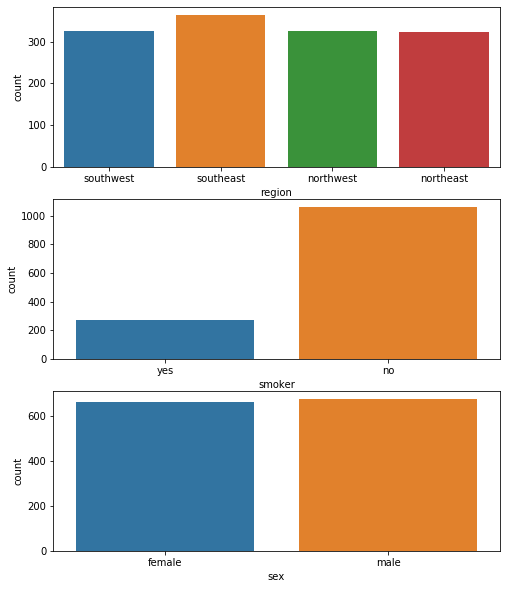

<Figure size 720x864 with 0 Axes>

In [268]:
  
    fig,ax=plt.subplots(3,1,figsize=(8,10))
    fig=plt.figure(figsize=(10,12))
    sns.countplot(data['region'],ax=ax[0])
    sns.countplot(data['smoker'],ax=ax[1])
    sns.countplot(data['sex'],ax=ax[2])
    

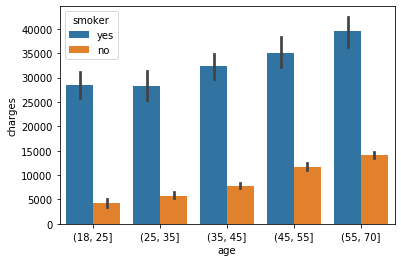

In [269]:
bins=[18,25,35,45,55,70]
sns.barplot(x=(pd.cut(data['age'],bins)),y=data['charges'],hue=data['smoker'])
plt.show()
            

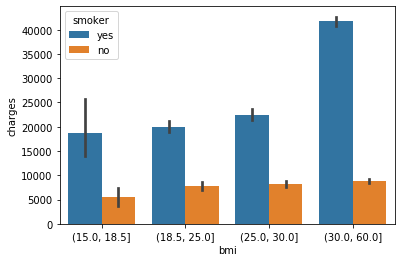

In [270]:
bins=[15,18.5,25,30,60]
sns.barplot(x=pd.cut(data['bmi'],bins),y=data['charges'],hue=data['smoker'])


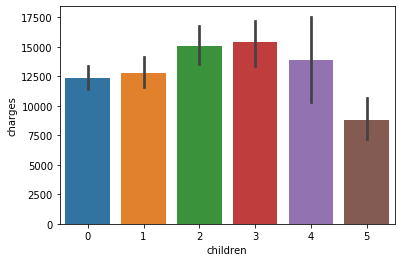

In [271]:








sns.barplot(x=data['children'],y=data['charges'])


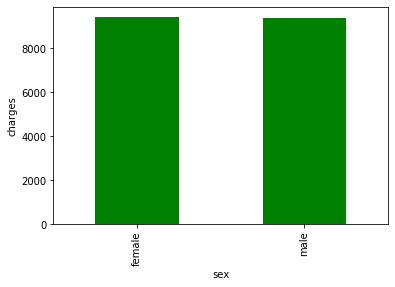

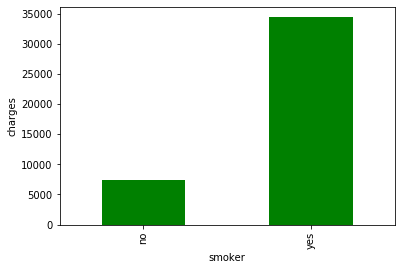

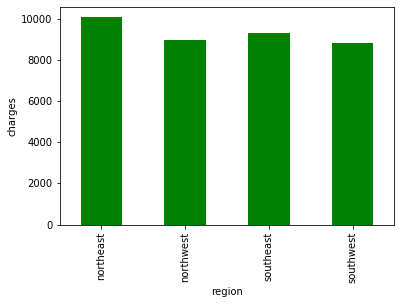

In [272]:
  for fea in categ_fea:
               
        data.groupby(fea)['charges'].median().plot.bar(color='g')
        plt.xlabel(fea)
        plt.ylabel('charges')
        plt.show()

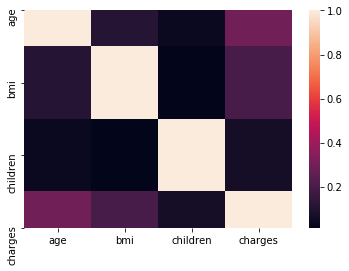

In [273]:
sns.heatmap(data.corr())

1)As per the table, it is observed that the charges for smoker is quite high in comparison with non-smoker.
2)The charges increases as the age of the person increases and it is comparatively higher in case of smokers. 
3)The charges increase as the bmi of the person increases. Also,the charges are very high in obese smokers (bmi > 30)
4)Heatmap also suggests positive correlation of charges with age and bmi.

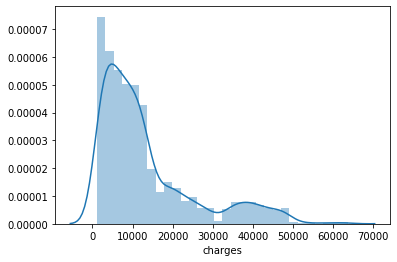

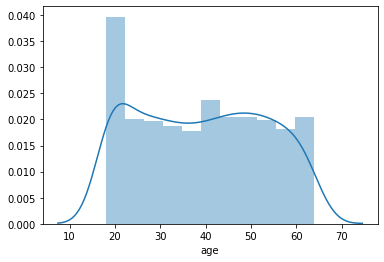

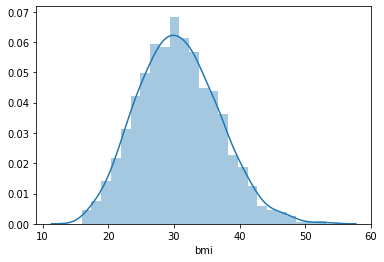

In [274]:
sns.distplot(data['charges'])
plt.show()
sns.distplot(data['age'])
plt.show()
sns.distplot(data['bmi'])


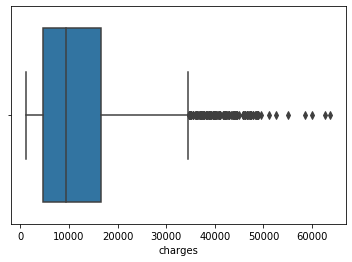

In [275]:
sns.boxplot(x=data['charges'],data=data)

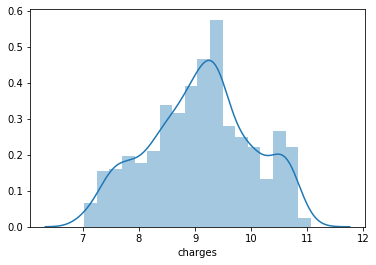

In [276]:
sns.distplot(np.log(data['charges']))

In [277]:
##encoding of categorical variables

data['sex']=np.where(data['sex']=='female',0,1)
data['smoker']=np.where(data['smoker']=='yes',1,0)



In [278]:
data.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


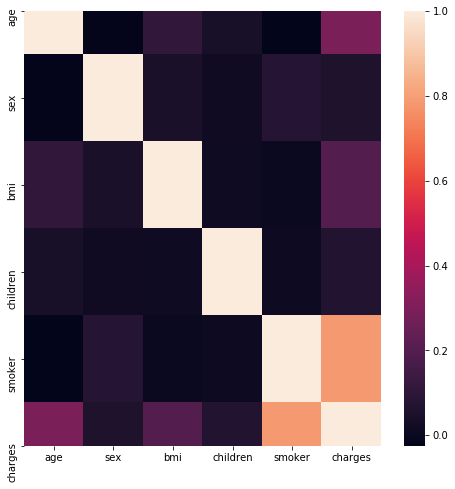

In [279]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())

In [280]:
# dropping region column 
# As children is also a categorical variable, converting it into dummy variable
# As the saleprice is right skewed and we will use lograthmic tranformation to overcome this

dataset=data.copy()
dataset=dataset.drop(columns=['region'])

dataset['charges']=np.log(data['charges'])
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,9.734176
1,18,1,33.770,1,0,7.453302
2,28,1,33.000,3,0,8.400538
3,33,1,22.705,0,0,9.998092
4,32,1,28.880,0,0,8.260197


#### Feature Scaling

In [281]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


fea_scale=['age','bmi']
scaler.fit(dataset[fea_scale])
data_x=dataset.drop(columns=['age','bmi'])
dataset=pd.concat([data_x,pd.DataFrame(scaler.transform(dataset[fea_scale]),columns=fea_scale)],axis=1)


In [282]:
dataset.head()

,sex,children,smoker,charges,age,bmi
0,0,0,1,9.734176,0.021739,0.321227
1,1,1,0,7.453302,0.000000,0.479150
2,1,3,0,8.400538,0.217391,0.458434
3,1,0,0,9.998092,0.326087,0.181464
4,1,0,0,8.260197,0.304348,0.347592


In [283]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
sex         1338 non-null int32
children    1338 non-null int64
smoker      1338 non-null int32
charges     1338 non-null float64
age         1338 non-null float64
bmi         1338 non-null float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 52.4 KB


In [284]:
#setting up dependent and independent data
y=dataset['charges']
x=dataset.drop(columns='charges')


##### Prediction

Model used for the prediction: 
1) KNeighbors Regression
2) Linear Regression
3) Random Forest Regression
4) Support Vector Regression

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [286]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score for knn Regression is %0.4f'%r2)
print('score for training set %.2f'%(knn.score(x_train,y_train)))
print('score for test set %.2f'%(knn.score(x_test,y_test)))


r2 score for knn Regression is 0.7998
score for training set 0.83
score for test set 0.80


In [287]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score for Linear Regression is %0.4f'%r2)
print('score for training set %.2f'%(lr.score(x_train,y_train)))
print('score for test set %.2f'%(lr.score(x_test,y_test)))



r2 score for Linear Regression is 0.7784
score for training set 0.76
score for test set 0.78


In [288]:
rbf=RandomForestRegressor(n_estimators=100)
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score for RandomForestRegression is %0.4f'%r2)
print('score for training set %.2f'%(rbf.score(x_train,y_train)))
print('score for test set %.2f'%(rbf.score(x_test,y_test)))


r2 score for RandomForestRegression is 0.8179
score for training set 0.97
score for test set 0.82


The accuracy has improved using RandomForestRegression but we are likely to be overfitting. To reduce overfitting, we could apply pre-pruning by changing the max_depth.

In [289]:
rbf=RandomForestRegressor(n_estimators=100,max_depth=6)
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score for RandomForestRegression is %0.4f'%r2)
print('score for training set %.2f'%(rbf.score(x_train,y_train)))
print('score for test set %.2f'%(rbf.score(x_test,y_test)))

r2 score for RandomForestRegression is 0.8431
score for training set 0.88
score for test set 0.84


The model accuracy slightly improved using pre-pruning method by setting max_depth=6

In [290]:
param_grid={'gamma':[0.0001,0.01,0.1,1,10],'C':[0.01,1,10,100,1000]}
grid_search=GridSearchCV(SVR(),param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
score=grid_search.score(x_test,y_test)
print('score: %.3f'%score)
grid_search.best_params_




score: 0.833


{'C': 1, 'gamma': 1}

The prediction by Knn and SVM model was good.
The best result came out by using Random Forest regression model with 84 percent accuracy.